In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
case_41_data = pd.read_csv('/content/c_60.csv')
print(case_41_data.shape)

(1705, 4)


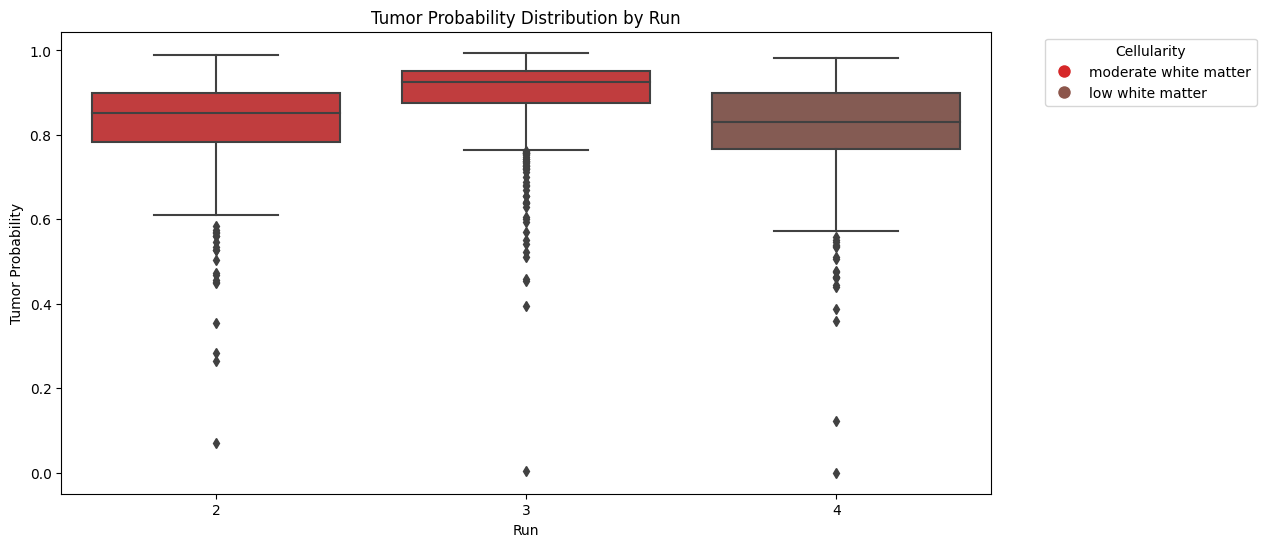

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(case_41_data)

cellularity = ['moderate white matter','moderate white matter','low white matter']
cellularity_colors = {
    'moderate white matter': '#d62728',
    'low white matter': '#8c564b'
}
# cellularity_colors = {
#     'high cortex': '#1f77b4',
#     'high white matter': '#ff7f0e',
#     'moderate cortex': '#2ca02c',
#     'moderate white matter': '#d62728',
#     'low cortex': '#9467bd',
#     'low white matter': '#8c564b',
#     'absent cortex': '#e377c2',
#     'absent white matter': '#7f7f7f',
#     'absent both': '#ff1493'
# }

# Create a custom color palette using the dictionary
palette = [cellularity_colors[cell] for cell in cellularity]

# Create a box plot to visualize the distribution of tumor probability by run
plt.figure(figsize=(12, 6))
sns.boxplot(x='Run', y='Tumor', data=df, palette=palette)
plt.title('Tumor Probability Distribution by Run')
plt.xlabel('Run')
plt.ylabel('Tumor Probability')
# Create a legend in the upper-right corner for cellularity
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=cell,
                            markersize=10, markerfacecolor=color) for cell, color in cellularity_colors.items()]
plt.legend(handles=legend_labels, title='Cellularity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


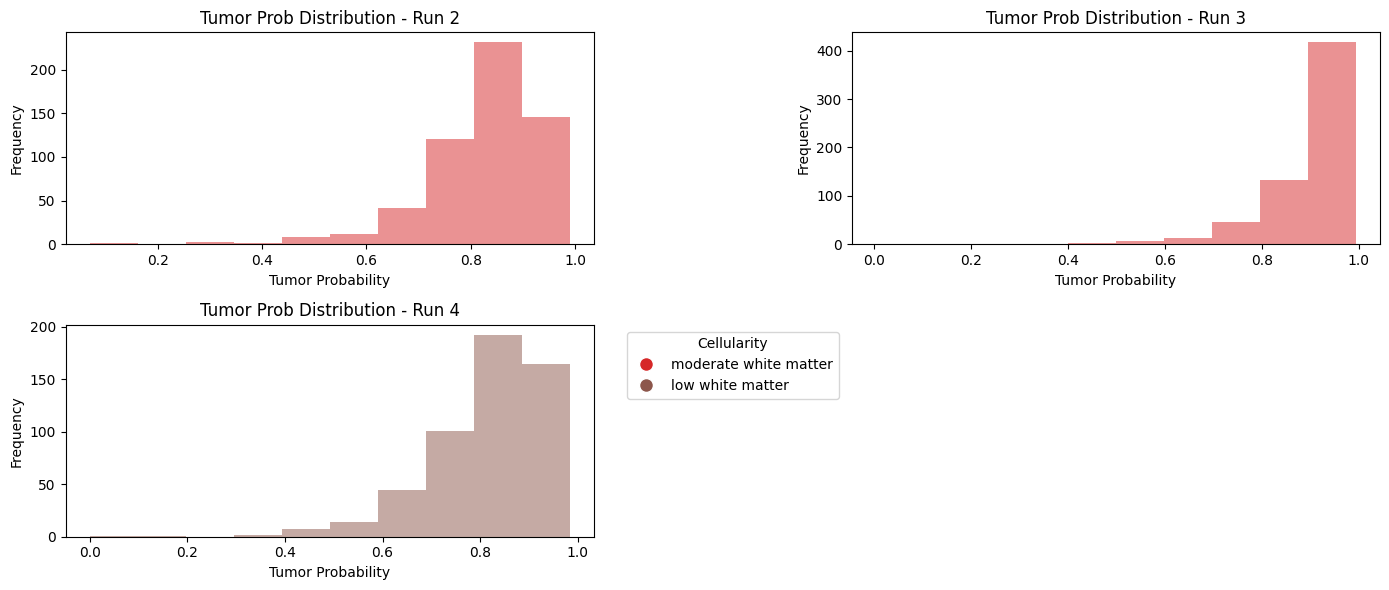

In [4]:
cellularity = ['moderate white matter','moderate white matter','low white matter']
cellularity_colors = {
    'moderate white matter': '#d62728',
    'low white matter': '#8c564b'
}
# Create a custom color palette using the dictionary
palette = [cellularity_colors[cell] for cell in cellularity]

# Create histograms for tumor probability for each distinct "run"
runs = df['Run'].unique()

num_rows = 2
num_cols = (len(runs) + 1) // 2  # Ensure at least 2 columns

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 6))

# Flatten the axs array to simplify indexing
axs = axs.ravel()

for i, run in enumerate(runs):
    # Filter data for the current run
    run_data = df[df['Run'] == run]

    # Plot histogram for the 'Tumor' column of the current run
    axs[i].hist(run_data['Tumor'], bins=10, alpha=0.5, color=palette[i])
    axs[i].set_title(f'Tumor Prob Distribution - Run {run}')
    axs[i].set_xlabel('Tumor Probability')
    axs[i].set_ylabel('Frequency')

# Hide any empty subplots
for i in range(len(runs), num_rows * num_cols):
    fig.delaxes(axs[i])

# Create a legend outside the subplots for cellularity
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=cell,
                            markersize=10, markerfacecolor=color) for cell, color in cellularity_colors.items()]
plt.legend(handles=legend_labels, title='Cellularity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()